# "Deploy A PyTorch Model The Easy Way"
> "We'll deploy the cattle breed predicter model showcased in my last post."

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [fastai, pytorch, cattle]
<!-- - image: images/some_folder/your_image.png -->
- hide: false
- search_exclude: false
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

# Deploy A PyTorch Model The Easy Way

What are we doing? Well we are going to create a mock up of an application using IPython widgets, Voilà and Binder. In a production setting you will likely use something more like fastapi or flask to serve a REST api version of your model and connect a nice interactive frontend to it, such as React or Vue JS. I think I'll attempt this later so stay tuned. For now we are going to grab the train model I created in my last post. The goal here is to get something up and shareable as fast as possible.

## Tools we will use

- IPython widgets (ipywidgets)
- Voilà
- Binder

## Setup

Open up Jupyter Notebooks and start a new notebook. Then install fastai whichever way is easiest for you. I usually choose to use `pip`. That's it!

In [1]:
from fastbook import *
from fastai.vision.widgets import *

In the last post I showed how to create a PyTorch model that would predict cattle breeds by uploading a photo. The trained model only works on a handful of different cattle breeds and could certainly be trained to recognize more. The breeds I chose to look at were the most common ones on google. They are `'black angus','charolais','hereford', 'simmental', 'red angus', 'texas longhorn', 'holstein', 'limousin', 'highlands'`.

In the last post I showed how a trained model could easily be export as a pickle file and loaded. Below we will just load the previously trained and saved model.

First we will create a `path` variable and just check our model does exist there.

In [2]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

As we can see there is one file located in the root folder that is a pickle file. This is our trained model.

When a model is being used for getting predictions, instead of training, it is called inference. To create our inference from the saved pickle file, we use the load_learner function.

In [3]:
learn_inf = load_learner(path/'export.pkl')

The inference learner can now be used to predict images like so.

In [4]:
learn_inf.predict('cattle/black angus/00000000.jpg')

('black angus',
 tensor(0),
 tensor([9.5432e-01, 1.8437e-03, 3.1340e-05, 1.2726e-02, 1.9705e-02, 2.0250e-04, 9.1235e-03, 3.7201e-05, 2.0100e-03]))

This returned three things. The first is the predicted category. Second is the the index of the predicted category. And lastly it returns the probabilities of each category.

To check what order the categories are in for the probabilities you can access the stored `vocab` of the DataLoader that was used.

In [5]:
learn_inf.dls.vocab

(#9) ['black angus','charolais','hereford','highlands','holstein','limousin','red angus','simmental','texas longhorn']

So we can see it returned index `0`, which happens to be `black angus` and is showing a probability of ~95%.

## Create an App from the Model

Down the road I'll show how we can deploy a model using Streamlit and fastapi but for now we will will prototype an application in Jupyter notebooks using IPython widgets and Voilà.

IPython widgets allow you to add interactive JavaScript components to your Python functions. Such GUI components as buttons, dropdowns, and sliders.

Voilà on the other hand takes your Jupyter notebook and converts it into a web application. One that a user doesn't have to run or even know that it is a notebook.

Let's start building our app one step at a time with ipywidgets components. The first thing we will need is a way to upload a file.

In [6]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

As you can see the `widgets.FileUpload()` will produce a button, that when chicked will allow you to upload an image. Once you select and image it will be stored in the `btn_upload` variable. `PILImage.create` can create an image from a number of upload formats and works well with our `btn_upload`.

In [10]:
img = PILImage.create(btn_upload.data[-1])

We can use an Output widget to display it the image.

In [11]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

And we can get our predictions by running the following.

In [12]:
pred,pred_idx,probs = learn_inf.predict(img)

There are also widgets we can use to label and show the output of the predictions.

In [13]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: highlands; Probability: 0.6961')

Lastly, we will create a button to run the classification. The button is just a button. We will create a call back to run a function which we will piece together below.

In [14]:
btn_run = widgets.Button(description="What's that cow?")
btn_run

Button(description="What's that cow?", style=ButtonStyle())

Here we will create a click event handler function. If you're familiar with React, Vue or plain JS this will come natually. Basically we are creating that python function that will be run when the button `What's that cow?` is clicked.

In [15]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

Lastly, we will put it all together into on vertical box (VBox). And this completes the mock up GUI.

In [16]:
btn_upload = widgets.FileUpload()

In [17]:
VBox([widgets.Label('Select your cattle!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

## Turning The Notebook into a Real App

Now that everything is working in the Jupyter notebook let's create our application. To do so, start a new Jupyter notebook and copy over only the code needed to create the widgets we need.

Below is everything I added to the notebook. In the end you won't even be able to see the code there.

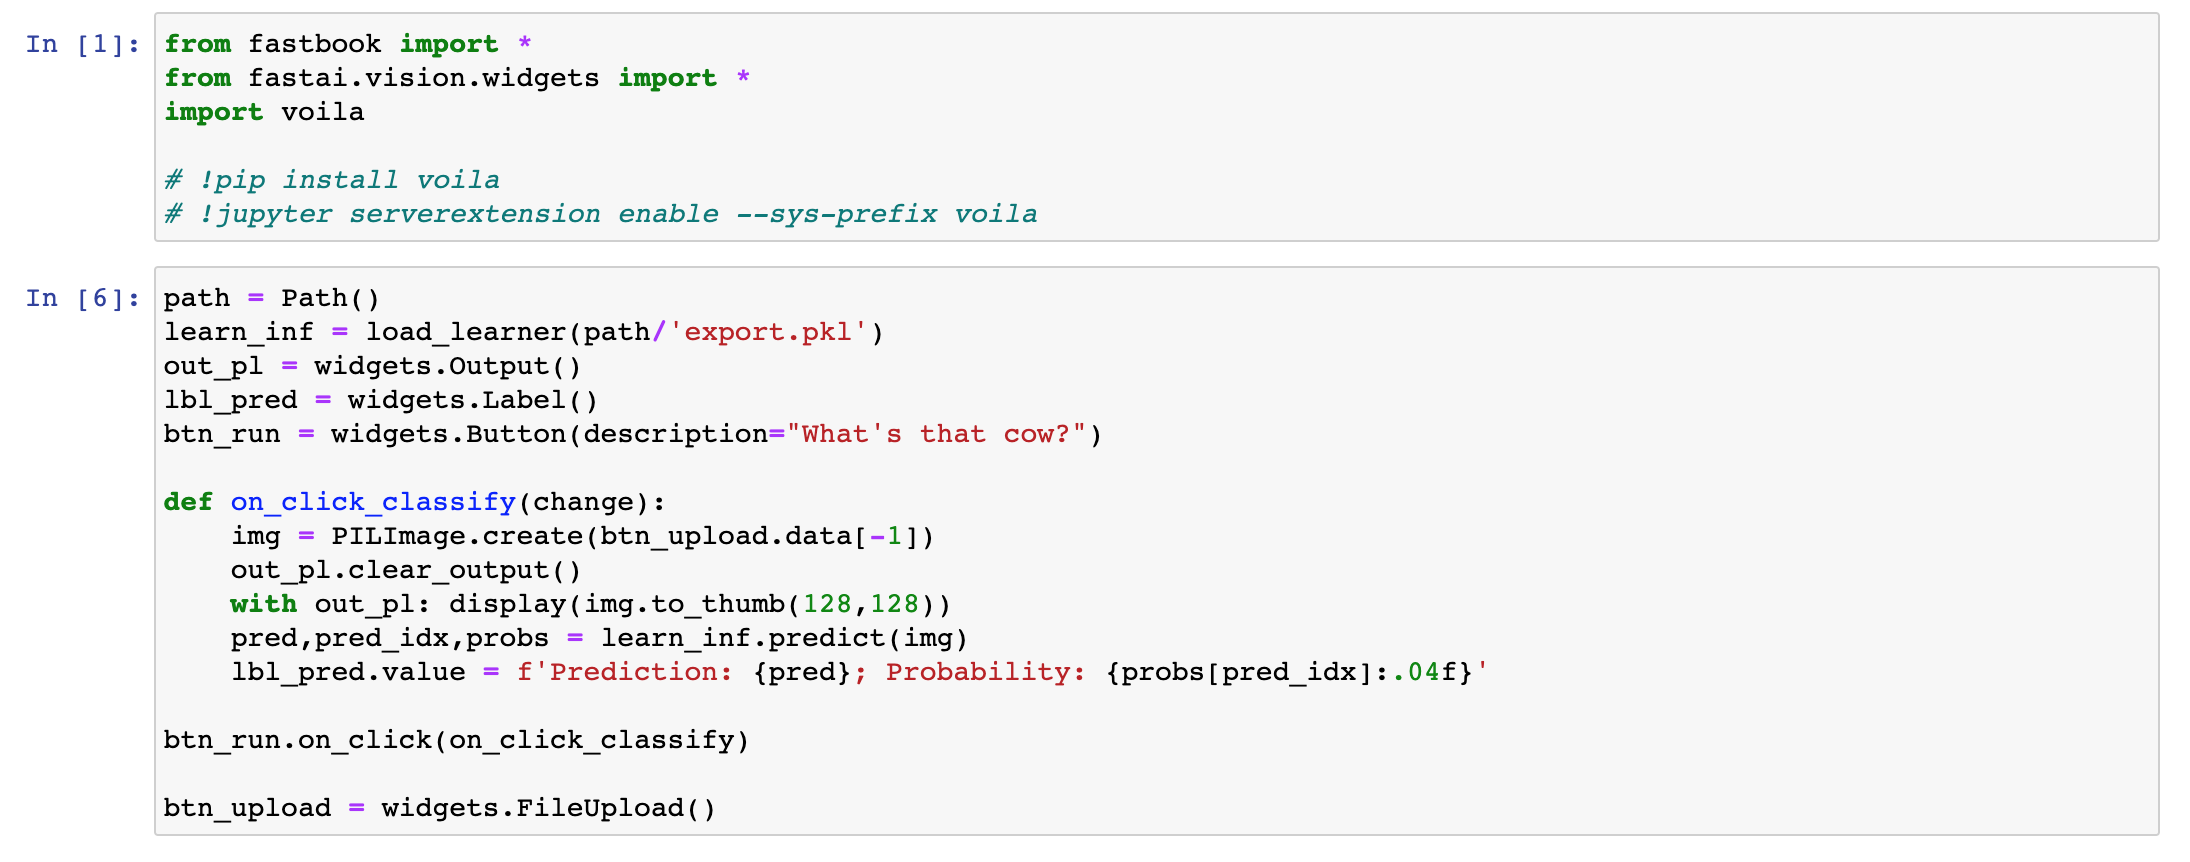

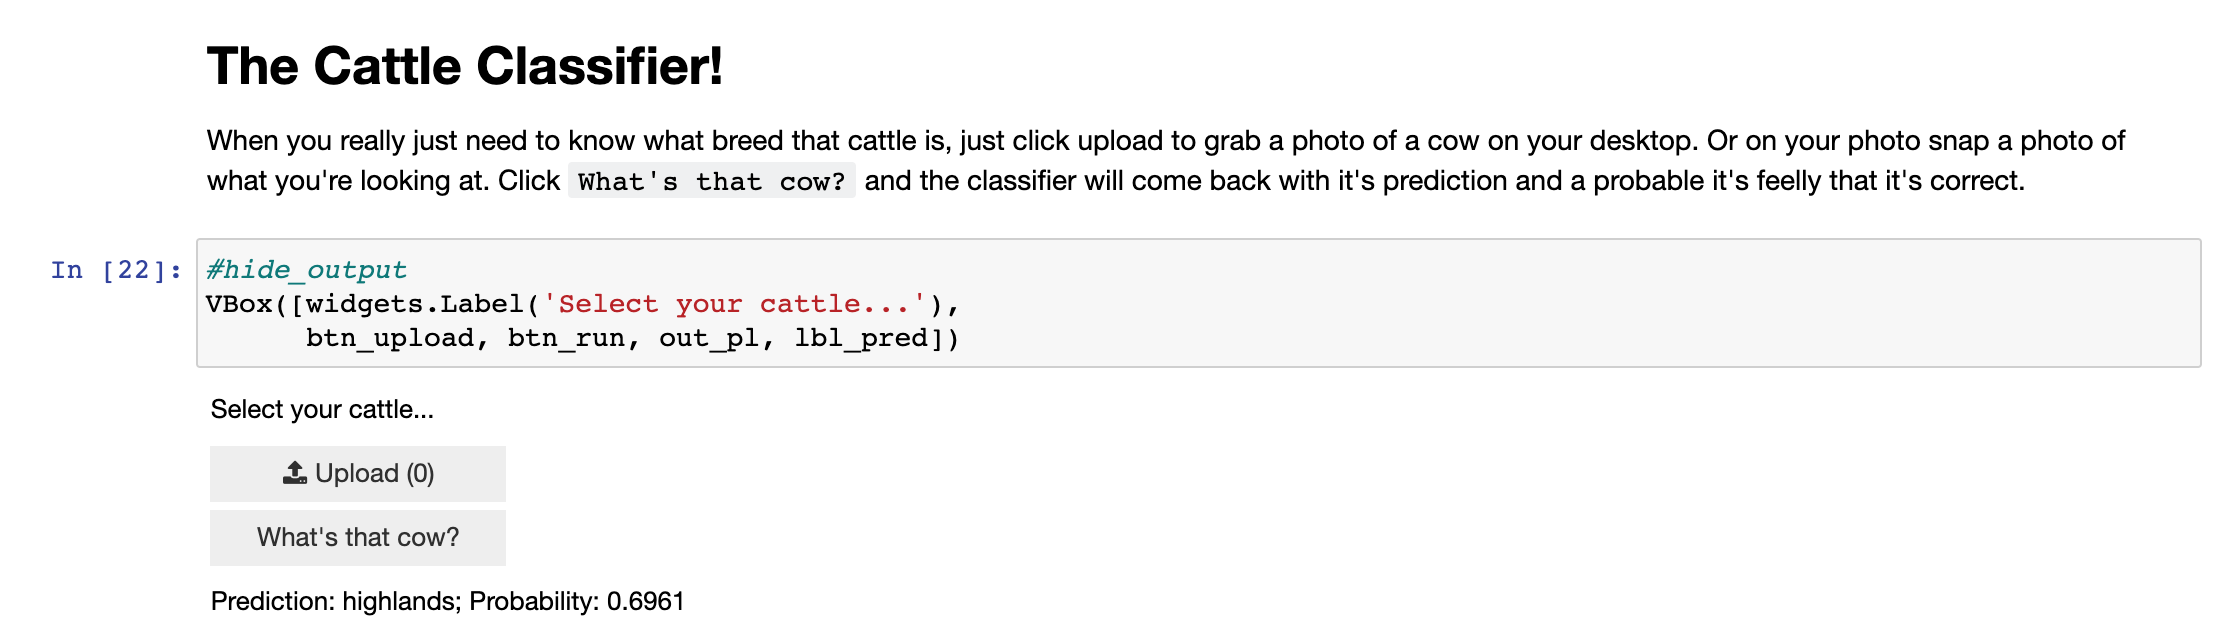

Next, install Voilà by running the following. If you get an error here check the order of `!jupyter serverextension enable --sys-prefix voila`. I've ran into issues a couple of time, however a quick Google search will tell you what the issue is.

In [18]:
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila

Now that Voilà is installed and imported you can see how it works. It basically runs the Jupyter notebook server just as it is currently running but it removes all of the inputs and only show the outputs of a cell. This allows use to only show the widgets and output while hiding all of the code used to create it.

Here is the app I created and how it turned out with Voilà!

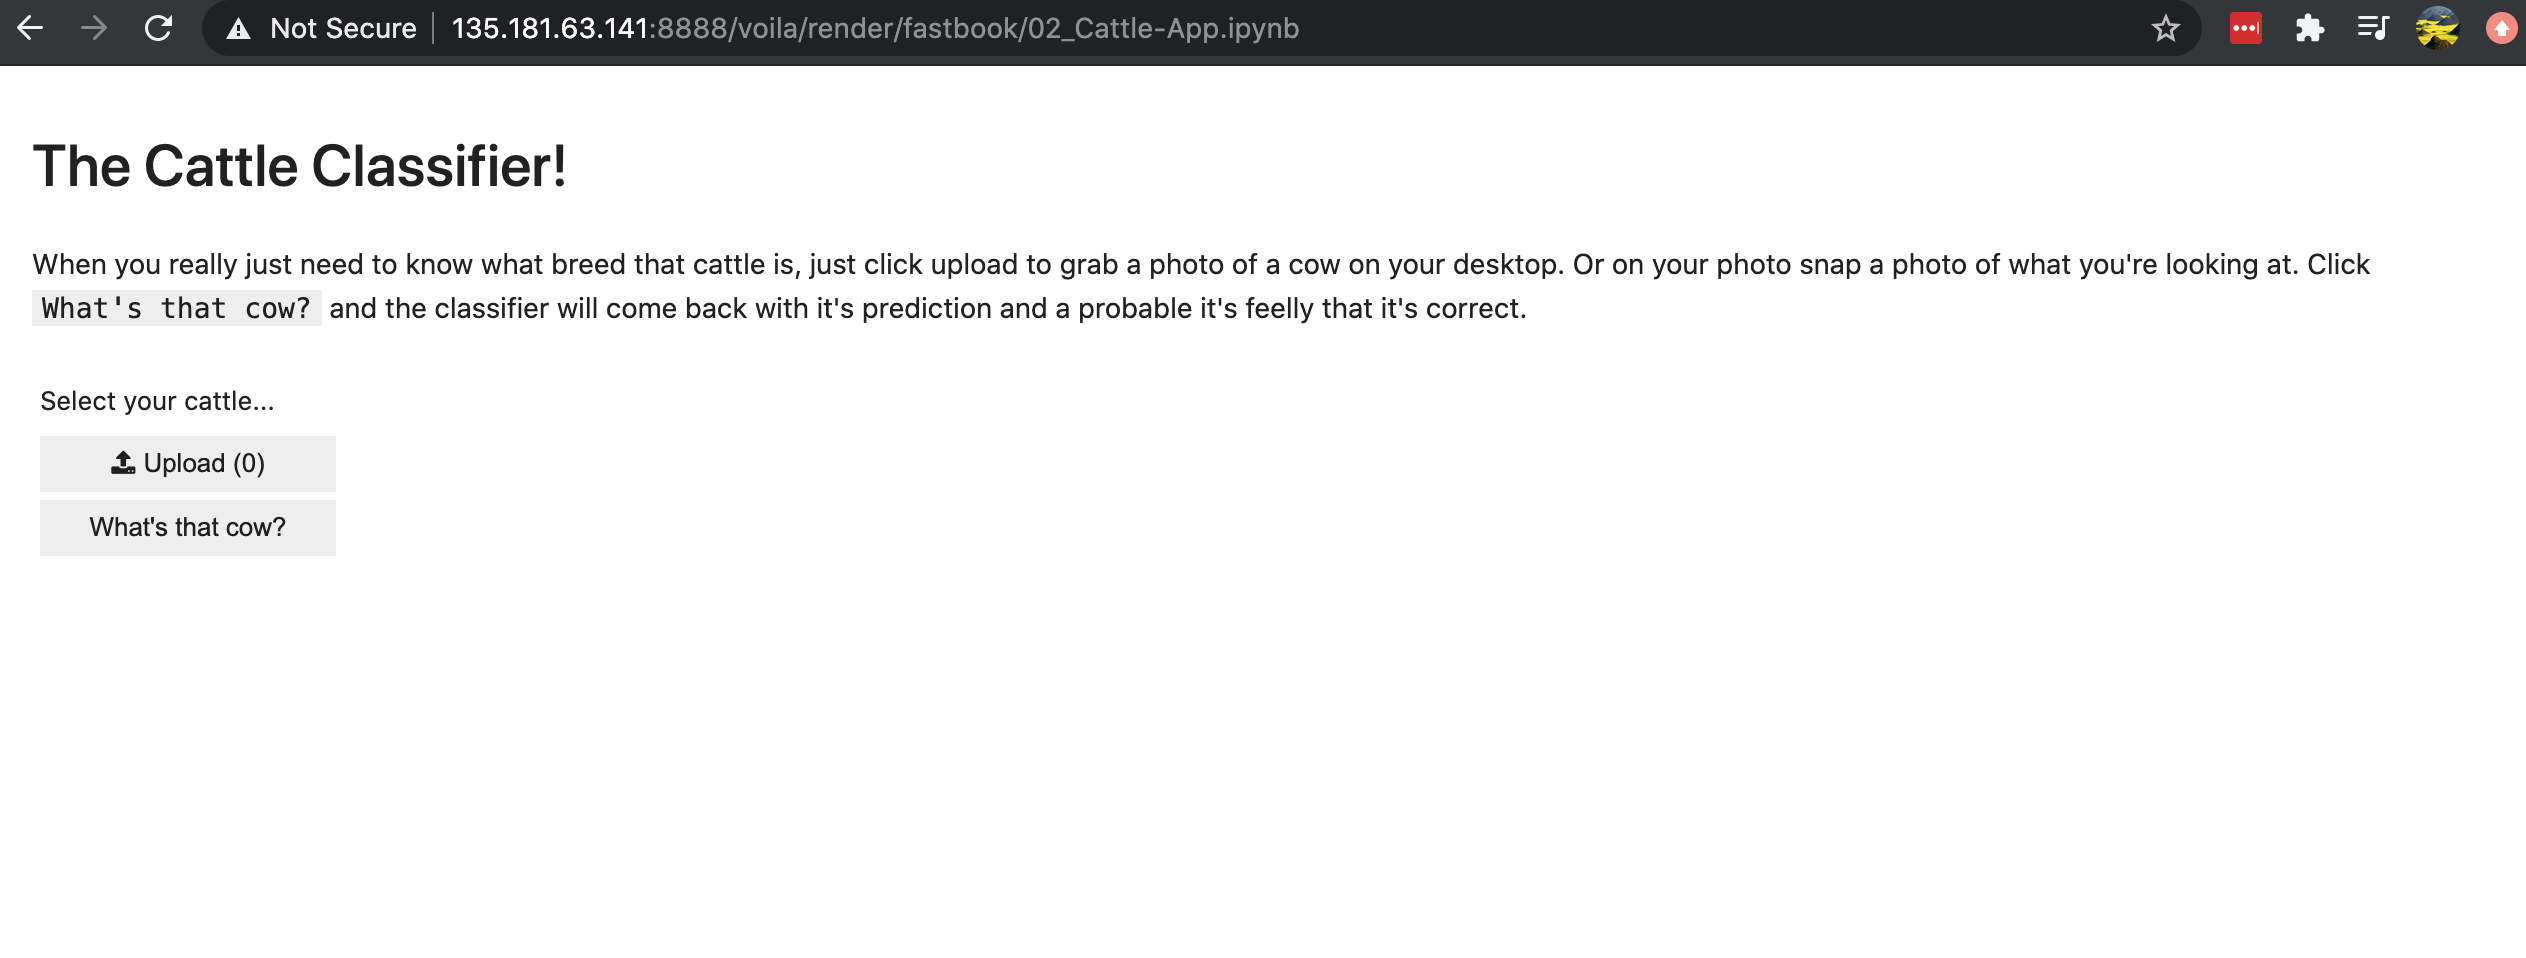

## Binder

Next you can publish your application to the web and share it using [Binder](https://mybinder.org/). Binder is free and requires no sign up. Complete the `Build and launch a repository`. To do so make sure you added your new notebook to a GitHub repository. Once you have past in the URL of that repository into Binder, change the filed dropdown to select URL. In the "URL to open" type `/voila/render/[name].ipynb`. Then click launch and this will create a URL that you can copy and share with others! Binder won't keep this here forever but it will stay for a while if it's consistently getting use.

## Conclusion

That's it! Thank you, and hope you enjoyed reading. Feel free to reach out if you have questions.